In [2]:
import pandas as pd
import numpy as np
import datetime as dt 
import yfinance as yf # yahoo finance library
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
# getting data from Jan 1st 2006 to Jan 1st 2016
start=dt.datetime( 2006,1,1)
end=dt.datetime( 2016,1,1)
print(start)

2006-01-01 00:00:00


In [4]:
# Bank of America Stocks
BAC=yf.download( tickers='BAC', start=start, end=end, auto_adjust=True) 

# CitiGroup Stocks
C=yf.download( tickers='C', start=start, end=end, auto_adjust=True) 

# Goldman Sacks Stocks
GS=yf.download( tickers='GS', start=start, end=end, auto_adjust=True) 

# JP Morgan Stocks
JPM=yf.download( tickers='JPM', start=start, end=end, auto_adjust=True) 

# Morgan Stanley Stocks
MS=yf.download( tickers='MS', start=start, end=end, auto_adjust=True) 

# Wells Fargo Stocks
WFC=yf.download( tickers='WFC', start=start, end=end, auto_adjust=True)
# auto_adjust=True is an arg. that ignores the fluctuations of market values of stocks when dividends are paid to stockholders

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
WFC.head()

Price,Close,High,Low,Open,Volume
Ticker,WFC,WFC,WFC,WFC,WFC
Date,,,,,
2006-01-03,18.566582,18.610234,18.156254,18.391975,11016400
2006-01-04,18.351233,18.520019,18.255198,18.508378,10870000
2006-01-05,18.330858,18.365779,18.223183,18.333768,10158000
2006-01-06,18.438536,18.493828,18.266838,18.380333,8403800
2006-01-09,18.435625,18.522930,18.365783,18.435625,5619600


In [6]:
tickers=list( 'BAC C GS JPM MS WFC'.split())
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [7]:
bank_stocks=pd.concat( [BAC, C, GS, JPM, MS, WFC], axis=1)
bank_stocks.head(2) # we created a multi index data frame that horizontaly concatenated the data
# bank_stocks['BAC']['Close']

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC,C,C,C,C,C,...,MS,MS,MS,MS,MS,WFC,WFC,WFC,WFC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,30.819628,30.885089,30.210829,30.714886,16296700,319.342529,319.925622,311.697494,317.463667,1537600,...,31.714355,31.812256,30.860445,31.094317,5377000,18.566582,18.610234,18.156254,18.391975,11016400
2006-01-04,30.492296,30.924347,30.407195,30.767236,17757900,313.446716,318.111496,313.252359,316.556576,1870960,...,31.736113,32.241933,31.736113,31.926476,7977800,18.351233,18.520019,18.255198,18.508378,10870000


In [8]:
bank_stocks.columns.names=['Stock Info', 'Bank Ticker'] # to rename the multiindex levels
bank_stocks.head(2) # now i want to round the price columns to 2 decimals
bank_stocks['Close','BAC'].round(decimals=2)

Date
2006-01-03    30.82
2006-01-04    30.49
2006-01-05    30.53
2006-01-06    30.49
2006-01-09    30.51
              ...  
2015-12-24    13.94
2015-12-28    13.83
2015-12-29    13.95
2015-12-30    13.77
2015-12-31    13.59
Name: (Close, BAC), Length: 2517, dtype: float64

In [9]:
prices=list( 'Close High Low Open'.split() )
prices

for price in prices:
    for tick in tickers:
        bank_stocks[price, tick]=bank_stocks[price, tick].round(decimals=2)

bank_stocks.head(2)

Stock Info,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Bank Ticker,BAC,BAC,BAC,BAC,BAC,C,C,C,C,C,...,MS,MS,MS,MS,MS,WFC,WFC,WFC,WFC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,30.82,30.89,30.21,30.71,16296700,319.34,319.93,311.70,317.46,1537600,...,31.71,31.81,30.86,31.09,5377000,18.57,18.61,18.16,18.39,11016400
2006-01-04,30.49,30.92,30.41,30.77,17757900,313.45,318.11,313.25,316.56,1870960,...,31.74,32.24,31.74,31.93,7977800,18.35,18.52,18.26,18.51,10870000


In [10]:
bank_stocks.head(1)
# ** What is the max Close price for each bank's stock throughout the time period?**
bank_stocks['Close'].max() # maximum closing price for each stock 

Bank Ticker
BAC     37.27
C      380.72
GS     184.17
JPM     53.35
MS      49.72
WFC     43.77
dtype: float64

In [11]:
bank_stocks.head(2)

Stock Info,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Bank Ticker,BAC,BAC,BAC,BAC,BAC,C,C,C,C,C,...,MS,MS,MS,MS,MS,WFC,WFC,WFC,WFC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,30.82,30.89,30.21,30.71,16296700,319.34,319.93,311.70,317.46,1537600,...,31.71,31.81,30.86,31.09,5377000,18.57,18.61,18.16,18.39,11016400
2006-01-04,30.49,30.92,30.41,30.77,17757900,313.45,318.11,313.25,316.56,1870960,...,31.74,32.24,31.74,31.93,7977800,18.35,18.52,18.26,18.51,10870000


In [61]:
closes=bank_stocks['Close']
closes.columns.names=['Tickers']
closes.head(3)

Tickers,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,30.82,319.34,94.32,23.98,31.71,18.57
2006-01-04,30.49,313.45,93.01,23.84,31.74,18.35
2006-01-05,30.53,315.00,92.98,23.91,31.82,18.33


In [13]:
ret= ((( closes['BAC'].iloc[0] / closes['BAC'].iloc[1] ) -1 )*100).round(decimals=2) # calculated the daily % change of closing price

In [14]:
rows=range(0,2517)
len(rows)

# there are the empty lists where the return closing prices will be stored to later create a data frame from this
returnBAC=[]
returnC=[]
returnGS=[]
returnJPM=[]
returnMS=[]
returnWFC=[]

for tick in tickers:
    for row in rows:
    # BAC
        if (tick == 'BAC') & (row != 0):
            elem = (((closes[tick].iloc[row] / closes[tick].iloc[row-1]) - 1) * 100).round(decimals=2)
            returnBAC.append(elem)
        elif (tick == 'BAC') & (row == 0):
            returnBAC.append(0)
    # C
        elif (tick == 'C') & (row != 0):
            elem = (((closes[tick].iloc[row] / closes[tick].iloc[row-1]) - 1) * 100).round(decimals=2)
            returnC.append(elem)
        elif (tick == 'C') & (row == 0):
            returnC.append(0)
    # GS
        elif (tick == 'GS') & (row != 0):
            elem = (((closes[tick].iloc[row] / closes[tick].iloc[row-1]) - 1) * 100).round(decimals=2)
            returnGS.append(elem)
        elif (tick == 'GS') & (row == 0):
            returnGS.append(0)
    # JMP
        elif (tick == 'JPM') & (row != 0):
            elem = (((closes[tick].iloc[row] / closes[tick].iloc[row-1]) - 1) * 100).round(decimals=2)
            returnJPM.append(elem)
        elif (tick == 'JPM') & (row == 0):
            returnJPM.append(0)
    # MS
        elif (tick == 'MS') & (row != 0):
            elem = (((closes[tick].iloc[row] / closes[tick].iloc[row-1]) - 1) * 100).round(decimals=2)
            returnMS.append(elem)
        elif (tick == 'MS') & (row == 0):
            returnMS.append(0)
    # WFC
        elif (tick == 'WFC') & (row != 0):
            elem = (((closes[tick].iloc[row] / closes[tick].iloc[row-1]) - 1) * 100).round(decimals=2)
            returnWFC.append(elem)
        elif (tick == 'WFC') & (row == 0):
            returnWFC.append(0)

In [15]:
closes.head(3)

Tickers,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,30.82,319.34,94.32,23.98,31.71,18.57
2006-01-04,30.49,313.45,93.01,23.84,31.74,18.35
2006-01-05,30.53,315.00,92.98,23.91,31.82,18.33


In [16]:
closes.index # to see the index of the closing prices data frame!

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [17]:
returns=pd.DataFrame( index=closes.index, 
                     data = 
                     {'BAC return':returnBAC,
                      'C return':returnC,
                      'GS return':returnGS,
                      'JPM return':returnJPM,
                      'MS return':returnMS,
                      'WFC return':returnWFC})
returns.head(4)

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,0.00,0.00,0.00,0.00,0.00,0.00
2006-01-04,-1.07,-1.84,-1.39,-0.58,0.09,-1.18
2006-01-05,0.13,0.49,-0.03,0.29,0.25,-0.11
2006-01-06,-0.13,0.00,1.41,0.71,0.13,0.60


In [18]:
correl=returns.corr()
print('The highest correlation between stock returns can be attributed to the Bank of America and JP Morgan bank with a positive correlation of {high}.'.
      format( high=correl.iloc[3,0].round(decimals=2)))
print(correl)

The highest correlation between stock returns can be attributed to the Bank of America and JP Morgan bank with a positive correlation of 0.82.
            BAC return  C return  GS return  JPM return  MS return  WFC return
BAC return    1.000000  0.803411   0.686092    0.815412   0.647229    0.828311
C return      0.803411  1.000000   0.668447    0.740083   0.637184    0.718071
GS return     0.686092  0.668447   1.000000    0.739418   0.808681    0.663282
JPM return    0.815412  0.740083   0.739418    1.000000   0.650486    0.827086
MS return     0.647229  0.637184   0.808681    0.650486   1.000000    0.602796
WFC return    0.828311  0.718071   0.663282    0.827086   0.602796    1.000000


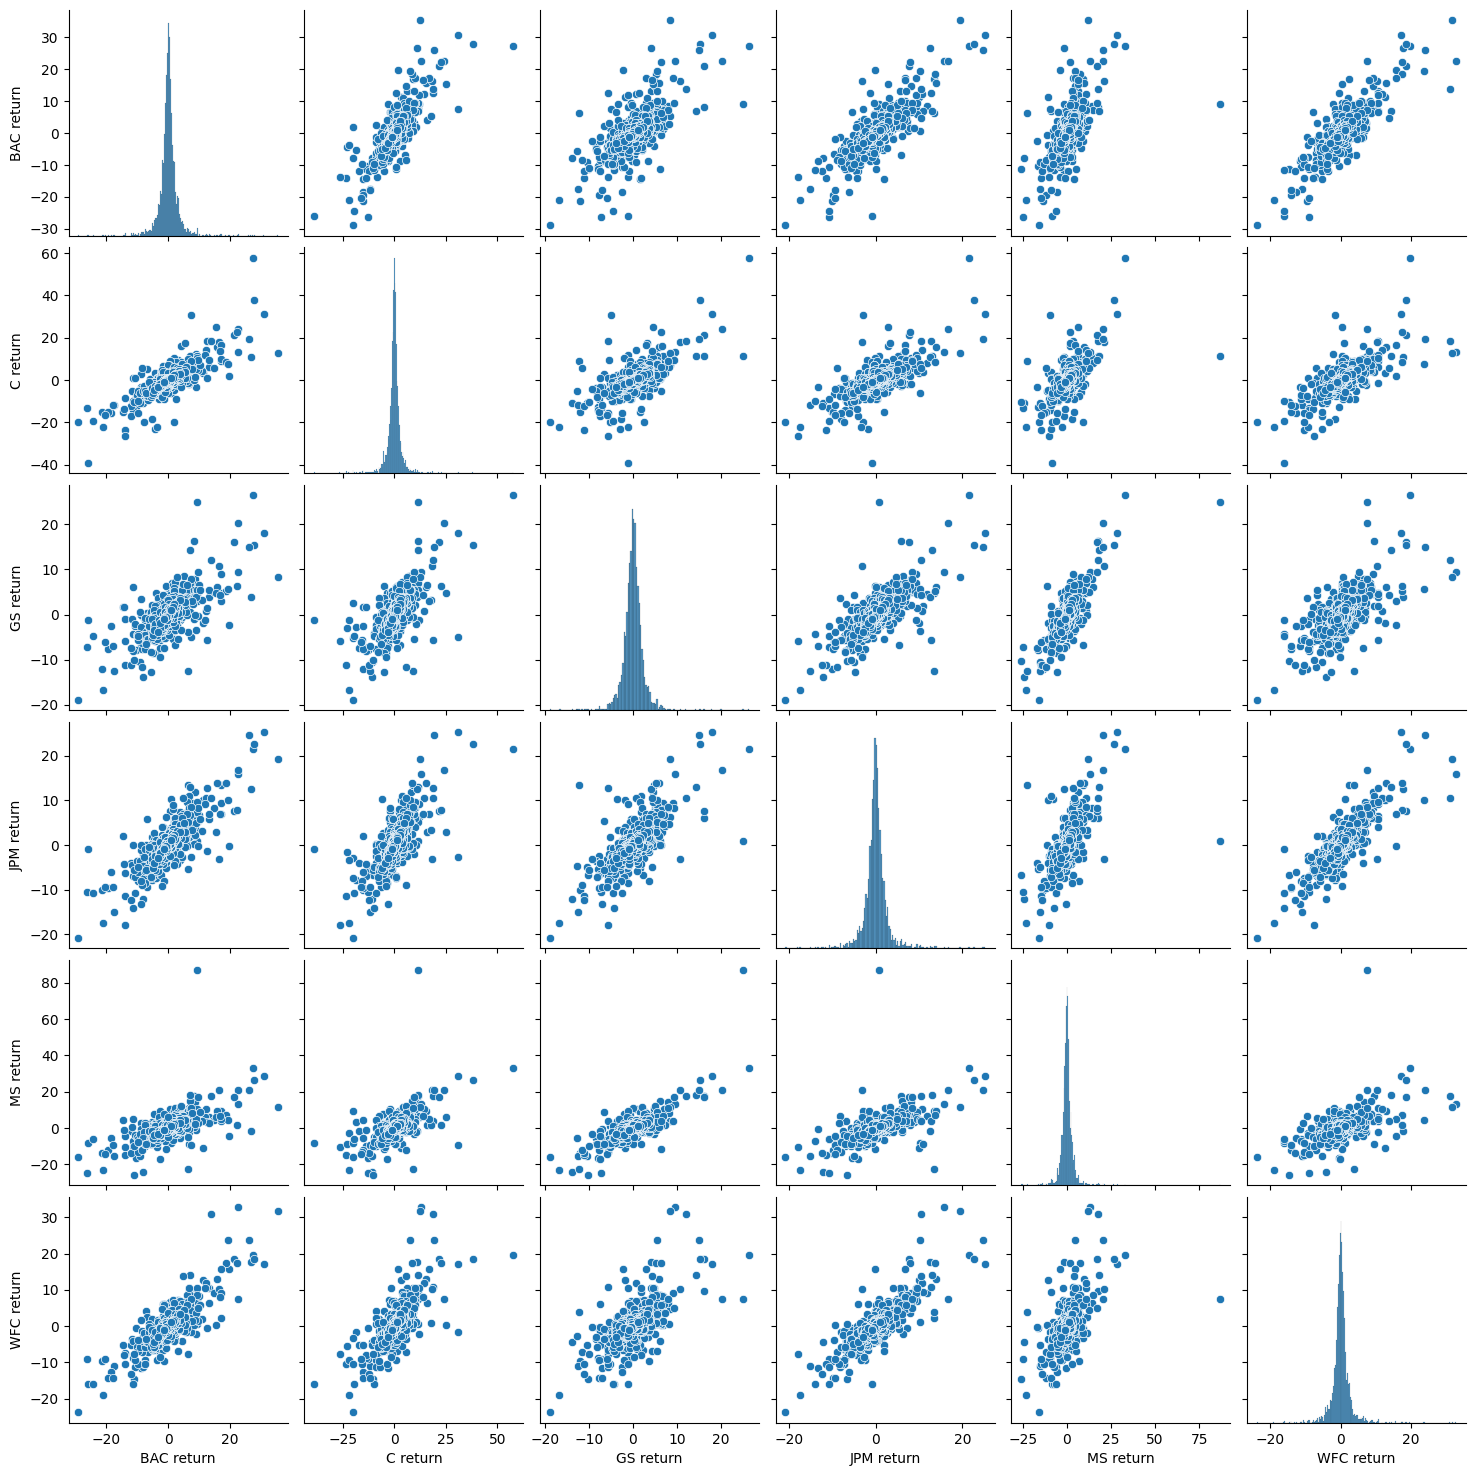

In [19]:
sns.pairplot(returns)

In [20]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,0.00,0.00,0.00,0.00,0.00,0.00
2006-01-04,-1.07,-1.84,-1.39,-0.58,0.09,-1.18
2006-01-05,0.13,0.49,-0.03,0.29,0.25,-0.11
2006-01-06,-0.13,0.00,1.41,0.71,0.13,0.60
2006-01-09,0.07,-0.47,1.21,1.62,1.04,0.00


In [21]:
maxdates=[] 
for col in returns.columns:
    maxdate=returns[ returns[col]==returns[col].max() ].index
    maxdates.append(maxdate)
maxdates

[DatetimeIndex(['2009-04-09'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2008-11-24'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2008-11-24'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2009-01-21'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2008-10-13'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2008-07-16'], dtype='datetime64[ns]', name='Date', freq=None)]

In [22]:
mindates=[] 
for col in returns.columns:
    mindate=returns[ returns[col]==returns[col].min() ].index
    mindates.append(mindate)
mindates 

# on the 20th January 2009, bank stocks had the worst returns recorded from 2006 to 2016.

[DatetimeIndex(['2009-01-20'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2009-02-27'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2009-01-20'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2009-01-20'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2008-10-09'], dtype='datetime64[ns]', name='Date', freq=None),
 DatetimeIndex(['2009-01-20'], dtype='datetime64[ns]', name='Date', freq=None)]

In [23]:
returns.std(axis=0)
# the most risky stock to hold would be that of Citi Group, since the standard deviation of it´s returns amounts to 3.8

BAC return    3.665207
C return      3.865936
GS return     2.538258
JPM return    2.767343
MS return     3.770227
WFC return    3.020540
dtype: float64

In [24]:
returns.head(2)
ret=returns.reset_index()
ret.head(2)

,Date,BAC return,C return,GS return,JPM return,MS return,WFC return
0,2006-01-03,0.00,0.00,0.00,0.00,0.00,0.00
1,2006-01-04,-1.07,-1.84,-1.39,-0.58,0.09,-1.18


In [25]:
melt_ret=ret.melt( id_vars='Date',
                      var_name='stock name', value_name='returns')
melt_ret.head(2)  # melting the returns data frame for interactive plotting

,Date,stock name,returns
0,2006-01-03,BAC return,0.00
1,2006-01-04,BAC return,-1.07


In [27]:
returns.head()
data1=returns.reset_index()
data1.head() # same as the returns dataset, but 'date' is a column and not an index

,Date,BAC return,C return,GS return,JPM return,MS return,WFC return
0,2006-01-03,0.00,0.00,0.00,0.00,0.00,0.00
1,2006-01-04,-1.07,-1.84,-1.39,-0.58,0.09,-1.18
2,2006-01-05,0.13,0.49,-0.03,0.29,0.25,-0.11
3,2006-01-06,-0.13,0.00,1.41,0.71,0.13,0.60
4,2006-01-09,0.07,-0.47,1.21,1.62,1.04,0.00


In [28]:
data1['Date']=data1['Date'].astype('str')
splits=data1['Date'].str.split(pat='-', expand=True)
data1['Years']=splits[0]
data1.head()

,Date,BAC return,C return,GS return,JPM return,MS return,WFC return,Years
0,2006-01-03,0.00,0.00,0.00,0.00,0.00,0.00,2006
1,2006-01-04,-1.07,-1.84,-1.39,-0.58,0.09,-1.18,2006
2,2006-01-05,0.13,0.49,-0.03,0.29,0.25,-0.11,2006
3,2006-01-06,-0.13,0.00,1.41,0.71,0.13,0.60,2006
4,2006-01-09,0.07,-0.47,1.21,1.62,1.04,0.00,2006


In [29]:
data1['Years']=data1['Years'].astype('int64')
d2015=data1[ data1['Years']==2015]
d2015['Date']=pd.to_datetime( d2015['Date'])
d2015.set_index('Date')
d2015.head(2)

C:\Users\dishi\AppData\Local\Temp\ipykernel_8672\2421064518.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,BAC return,C return,GS return,JPM return,MS return,WFC return,Years
2265,2015-01-02,0.07,0.27,0.30,0.49,-0.24,-0.22,2015
2266,2015-01-05,-2.94,-3.15,-3.12,-3.11,-3.12,-2.75,2015


In [30]:
d2015.head()

,Date,BAC return,C return,GS return,JPM return,MS return,WFC return,Years
2265,2015-01-02,0.07,0.27,0.30,0.49,-0.24,-0.22,2015
2266,2015-01-05,-2.94,-3.15,-3.12,-3.11,-3.12,-2.75,2015
2267,2015-01-06,-2.96,-3.51,-2.02,-2.59,-2.89,-2.09,2015
2268,2015-01-07,0.45,0.92,1.50,0.16,1.43,0.60,2015
2269,2015-01-08,2.07,1.51,1.59,2.23,1.49,2.22,2015


In [43]:
print( d2015.std(axis=0)) 
print('Morgan Stanley has the riskiest stock return in 2015 according to the data, with the standard deviation of {st}'.format( st=1.62))

Date          104 days 20:04:55.551720886
BAC return                       1.618405
C return                         1.529003
GS return                        1.404226
JPM return                       1.400467
MS return                        1.628832
WFC return                       1.255154
Years                                 0.0
dtype: object
Morgan Stanley has the riskiest stock return in 2015 according to the data, with the standard deviation of 1.62


The distribution of this stock shows returns that are not tightly clustered around the mean, which is centered at 0. Returns are spread out across values


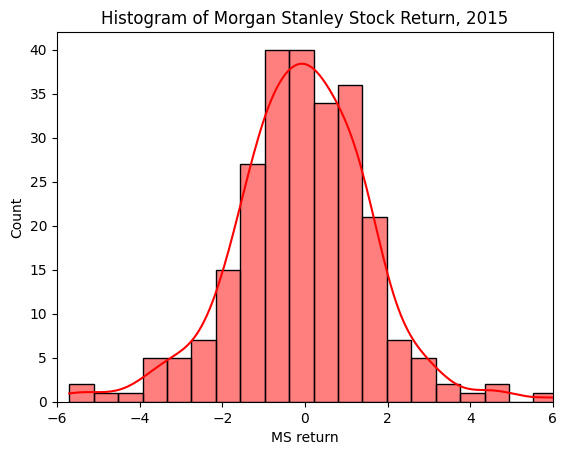

In [50]:
p1=sns.histplot( data=d2015, x='MS return', kde=True, color='red')
p1.set_xlim( [-6,6])
p1.set_title('Histogram of Morgan Stanley Stock Return, 2015')
print('The distribution of this stock shows returns that are not tightly clustered around the mean, which is centered at 0. Returns are spread out across values')

In [62]:
closes.head(2)
closes.reset_index(inplace=True)

In [69]:
closes.head(2)

Tickers,Date,BAC,C,GS,JPM,MS,WFC
0,2006-01-03,30.82,319.34,94.32,23.98,31.71,18.57
1,2006-01-04,30.49,313.45,93.01,23.84,31.74,18.35


In [71]:
meltclose=closes.melt( id_vars='Date', value_name='Closing prices',var_name='Bank stocks')
meltclose.head(2)

,Date,Bank stocks,Closing prices
0,2006-01-03,BAC,30.82
1,2006-01-04,BAC,30.49


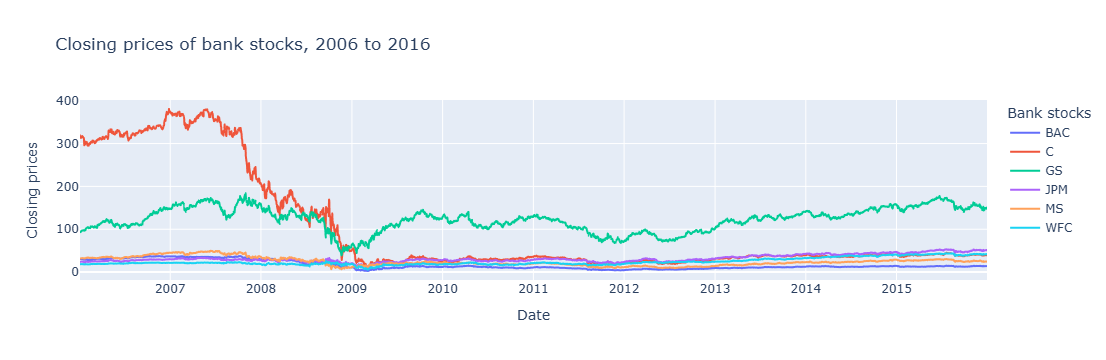

In [72]:
fig3=px.line( meltclose, color='Bank stocks', hover_name='Bank stocks', x='Date', y='Closing prices',
            title='Closing prices of bank stocks, 2006 to 2016')
fig3.show()

In [32]:
import pandas as pd
import datetime as dt
import yfinance as yf

In [33]:
en=dt.datetime( 2025, 9, 21) 
st=dt.datetime( 2025, 1, 1)
df=yf.download( tickers=['AAPL','SPOT','005930.KS'], start=st, end=en) 

def rounding(df):
    for col in df.columns:
        if df[col].dtype=='float64':
            df[col]=df[col].round(decimals=2)
    return df 

df=rounding(df)
df.head(2)

C:\Users\dishi\AppData\Local\Temp\ipykernel_8672\1257257645.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  3 of 3 completed


Price          Close                      High                       Low  \
Ticker     005930.KS    AAPL    SPOT 005930.KS    AAPL    SPOT 005930.KS   
Date                                                                       
2025-01-02  52760.98  242.99  457.79  52958.59  248.22  460.27  51674.15   
2025-01-03  53749.02  242.50  466.69  54440.64  243.32  472.80  52168.17   

Price                           Open                      Volume              \
Ticker        AAPL    SPOT 005930.KS    AAPL    SPOT   005930.KS        AAPL   
Date                                                                           
2025-01-02  240.96  443.21  52069.36  248.05  450.58  16630538.0  55740700.0   
2025-01-03  241.03  459.50  52168.17  242.50  459.95  19318046.0  40244100.0   

Price                  
Ticker           SPOT  
Date                   
2025-01-02  1092300.0  
2025-01-03  1185700.0

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
closes=df.loc[:,'Close']

# filling the missing closing prices with the most frequent closing price for each stock
for col in closes.columns:
    closes.loc[:,col]=closes.loc[:,col].fillna( value=closes.loc[:,col].mean())
    
closes.reset_index(inplace=True)
renames={'Ticker':'Index'}
closes=closes.rename( mapper=renames, axis=1)
closes.head()

Ticker,Date,005930.KS,AAPL,SPOT
0,2025-01-02,52760.98,242.99,457.79
1,2025-01-03,53749.02,242.50,466.69
2,2025-01-06,55231.07,244.13,468.93
3,2025-01-07,54737.05,241.35,463.93
4,2025-01-08,56614.32,241.84,479.73


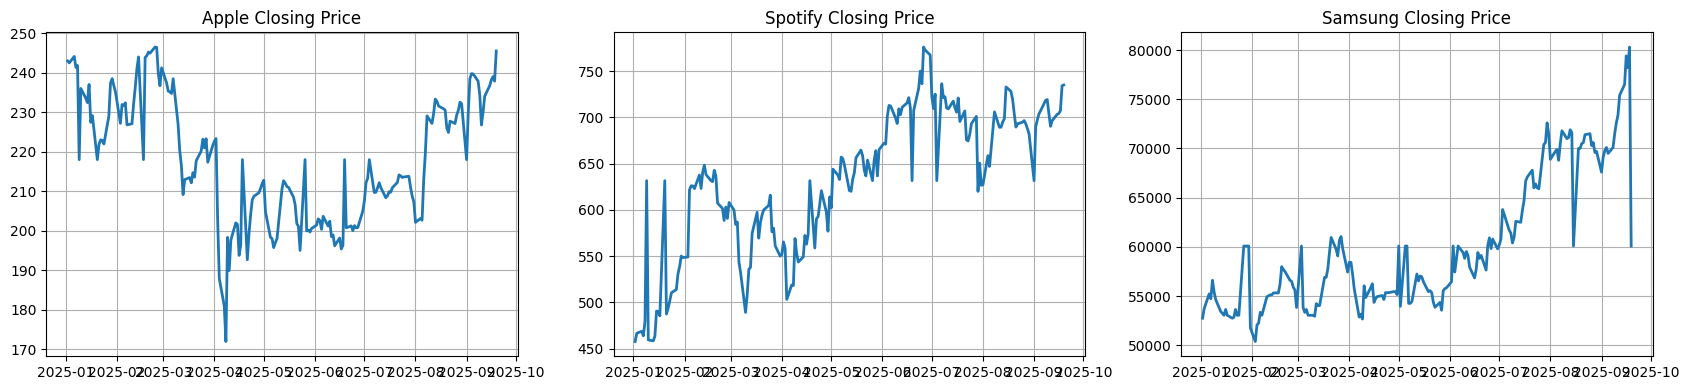

In [36]:
fig, axes=plt.subplots(nrows=1,ncols=3, figsize=(17,4))
axes[0].plot(closes['Date'], closes['AAPL'], lw=2)
axes[0].set_title('Apple Closing Price')
axes[0].grid(True)

axes[1].plot(closes['Date'], closes['SPOT'], lw=2)
axes[1].set_title('Spotify Closing Price')
axes[1].grid(True)

axes[2].plot(closes['Date'], closes['005930.KS'], lw=2)
axes[2].set_title('Samsung Closing Price')
axes[2].grid(True)

plt.tight_layout()

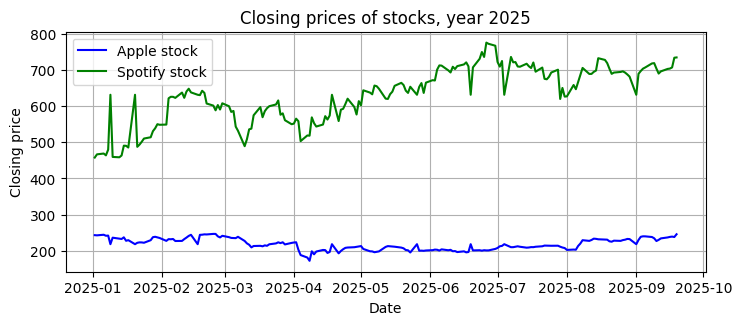

In [37]:
fig=plt.figure( figsize=(8,3))
axes=fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(closes['Date'], closes['AAPL'], lw=1.5, color='blue', label='Apple stock')
axes.plot(closes['Date'], closes['SPOT'], lw=1.5, color='green', label='Spotify stock')
axes.set_xlabel('Date')
axes.set_ylabel('Closing price')
axes.legend(loc=0)
axes.set_title('Closing prices of stocks, year 2025')
axes.grid(True)

In [38]:
closes.head()
melted=closes.melt( id_vars='Date', value_name='Closing price', var_name='Stocks')
import plotly.express as px
melted.head(2)

,Date,Stocks,Closing price
0,2025-01-02,005930.KS,52760.98
1,2025-01-03,005930.KS,53749.02


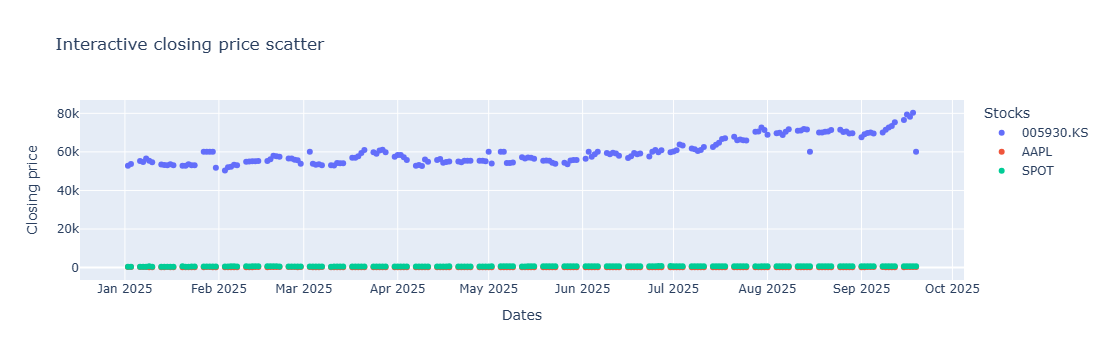

In [39]:
f1=px.scatter( melted, color='Stocks', x='Date', y='Closing price', labels={'Date':'Dates'}, title='Interactive closing price scatter' )
f1.show()